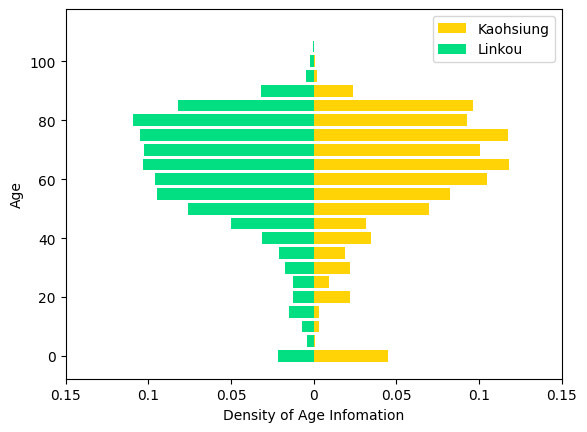

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

kaohsiung = pd.read_csv("./data/test_A_baumannii_mdr.csv")
linkou = pd.read_csv("./data/train_A_baumannii_mdr.csv")

kaohsiung = kaohsiung['AGE']
linkou = linkou['AGE']

age = [i for i in range(0, 111, 5)]
linkou_age = [0 for i in range(0, 111, 5)]
kaohsiung_age = [0 for i in range(0, 111, 5)]

for i in kaohsiung:
    kaohsiung_age[int(i)//5] += 1
for i in linkou:
    linkou_age[int(i)//5] += 1

kaohsiung_age = [i/sum(kaohsiung_age) for i in kaohsiung_age]
linkou_age = [i/sum(linkou_age) for i in linkou_age]

population_df = pd.DataFrame({"Age": age, "Linkou": linkou_age, "Kaohsiung": kaohsiung_age})

population_df["Kaohsiung_Left"] = 0
population_df["Kaohsiung_Width"] = population_df["Kaohsiung"]

population_df["Linkou_Left"] = -population_df["Linkou"]
population_df["Linkou_Width"] = population_df["Linkou"]

plt.barh(y=population_df["Age"], width=population_df["Kaohsiung_Width"], height=4, color="#FFD306", label="Kaohsiung")
plt.barh(y=population_df["Age"], width=population_df["Linkou_Width"], height=4, left=population_df["Linkou_Left"],
         color="#02DF82", label="Linkou")

plt.xlim(-0.15,0.15)
plt.xticks([-0.15, -0.1, -0.05, 0, 0.05, 0.1, 0.15], [0.15, 0.1, 0.05, 0, 0.05, 0.1, 0.15])

plt.legend(loc="best")

plt.xlabel("Density of Age Infomation")
plt.ylabel("Age")

plt.show()

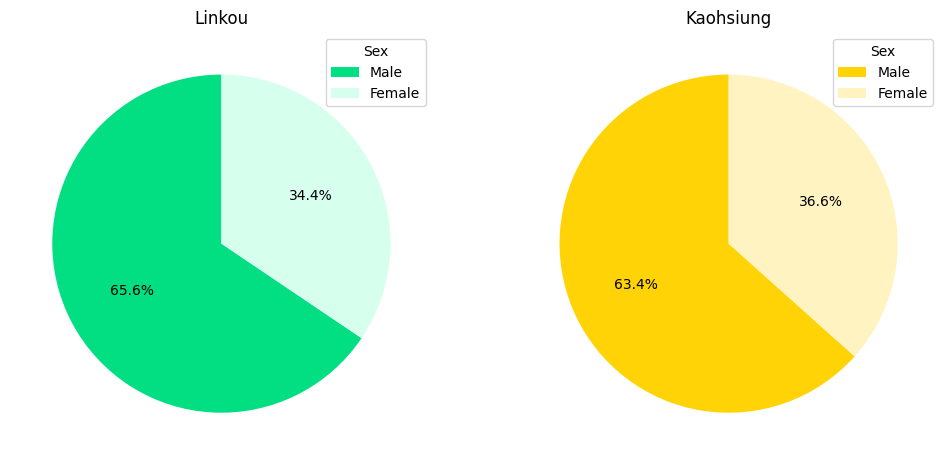

In [26]:
kaohsiung = pd.read_csv("./data/test_A_baumannii_mdr.csv")
linkou = pd.read_csv("./data/train_A_baumannii_mdr.csv")

kaohsiung = kaohsiung['Gender']
linkou = linkou['GENDER']

kaohsiung_sex = [0, 0]
linkou_sex = [0, 0]

for i in kaohsiung:
    if i == "M":
        kaohsiung_sex[0] += 1
    else:
        kaohsiung_sex[1] += 1
for i in linkou:
    if i == "M":
        linkou_sex[0] += 1
    else:
        linkou_sex[1] += 1

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.pie(kaohsiung_sex, autopct="%.1f%%", startangle=90, colors=["#FFD306", "#FFF4C1"])
plt.title("Kaohsiung")
plt.legend(title="Sex", labels=["Male","Female"])
plt.subplot(1, 2, 1)
plt.pie(linkou_sex, autopct="%.1f%%", startangle=90, colors=["#02DF82","#D7FFEE"])
plt.title("Linkou")
plt.legend(title="Sex", labels=["Male","Female"])

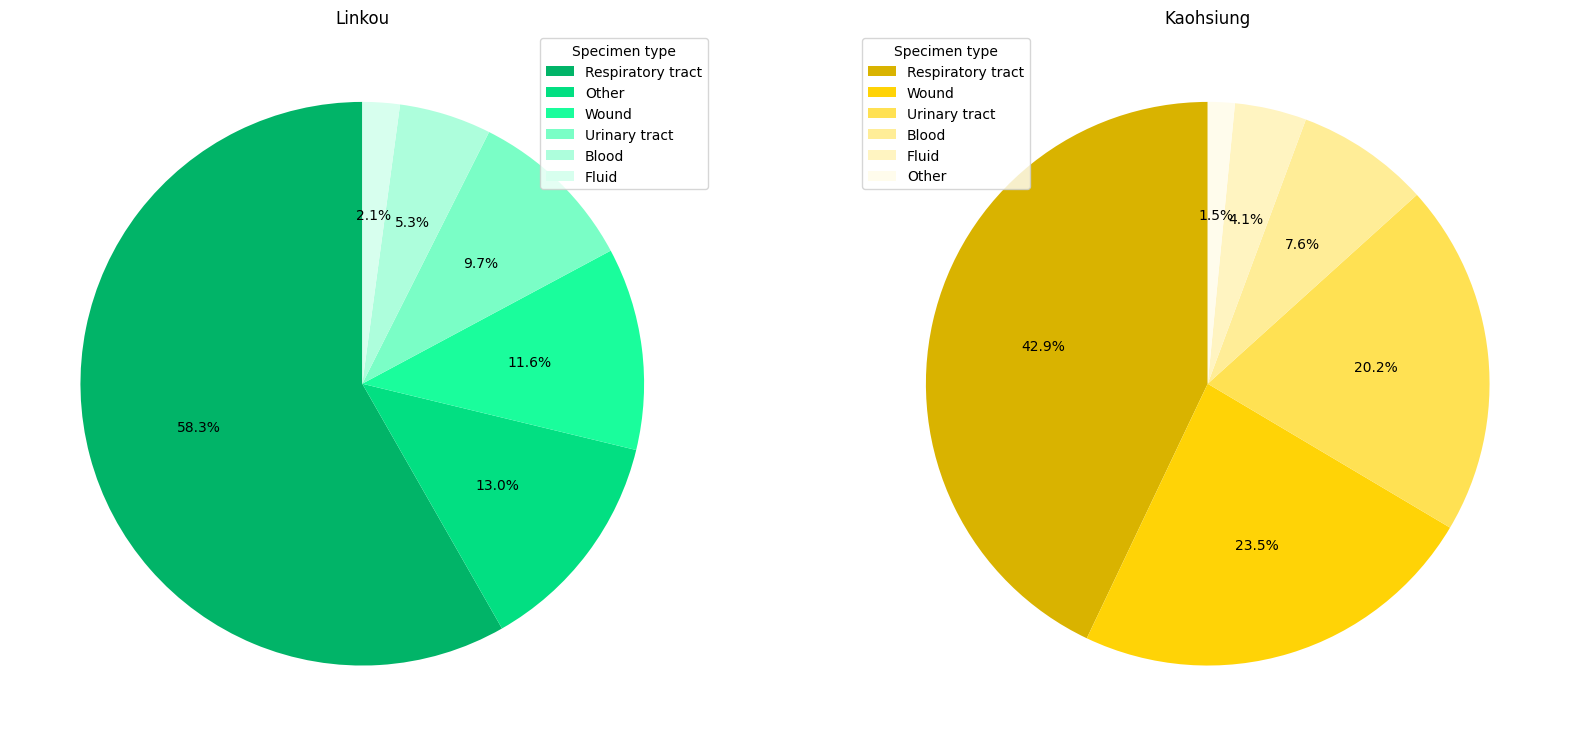

In [48]:
kaohsiung = pd.read_csv("./data/test_A_baumannii_mdr.csv")
linkou = pd.read_csv("./data/train_A_baumannii_mdr.csv")

kaohsiung = kaohsiung['SPC']
linkou = linkou['SPC']

kaohsiung_spc = [0,0,0,0,0,0]
linkou_spc = [0,0,0,0,0,0]

for i in kaohsiung:
    if i == 'R':
        kaohsiung_spc[0] += 1
    elif i == 'W':
        kaohsiung_spc[1] += 1
    elif i == 'U':
        kaohsiung_spc[2] += 1
    elif i == 'B':
        kaohsiung_spc[3] += 1
    elif i == 'F':
        kaohsiung_spc[4] += 1
    else:
        kaohsiung_spc[5] += 1

for i in linkou:
    if i == 'R':
        linkou_spc[0] += 1
    elif i == 'OT':
        linkou_spc[1] += 1
    elif i == 'W':
        linkou_spc[2] += 1
    elif i == 'U':
        linkou_spc[3] += 1
    elif i == 'B':
        linkou_spc[4] += 1
    elif i == 'F':
        linkou_spc[5] += 1
    

plt.figure(figsize=(20, 15))
plt.subplot(1, 2, 2)
plt.pie(kaohsiung_spc, autopct="%.1f%%", startangle=90, colors=["#D9B300", "#FFD306", "#FFE153", "#FFED97", "#FFF4C1", "#FFFCEC"])
plt.title("Kaohsiung")
plt.legend(title="Specimen type", labels=["Respiratory tract","Wound","Urinary tract","Blood","Fluid","Other"], loc="best")
plt.subplot(1, 2, 1)
plt.pie(linkou_spc, autopct="%.1f%%", startangle=90, colors=["#01B468", "#02DF82","#1AFD9C", "#7AFEC6", "#ADFEDC", "#D7FFEE"])
plt.title("Linkou")
plt.legend(title="Specimen type", labels=["Respiratory tract","Other","Wound","Urinary tract","Blood","Fluid"], loc="best")

In [80]:
import pandas as pd
import xgboost as xgb
from xgboost import XGBClassifier
import numpy as np
import csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, confusion_matrix

In [68]:
train = pd.read_csv('./data/train.csv')
label_train = pd.read_csv('./data/label_train.csv')

In [69]:
params = {
    'booster': "gbtree",
    'objective': "binary:logistic", 
    'eta': 0.1, 
    'gamma':0.1,
    'max_depth': 8,
    'min_child_weight': 1,
    'subsample': 1,
    'colsample_bytree': 1,
    'alpha': 0.01,
    'lambda':0.01,
    'eval_metric': 'auc',
    'seed': 123
    }

X_train_CAZ, X_test_CAZ, y_train_CAZ, y_test_CAZ = train_test_split(train, label_train['CAZ'], test_size=0.3, random_state=1)
dtrain = xgb.DMatrix(data=X_train_CAZ, label=y_train_CAZ)
model_CAZ = xgb.train(params=params, dtrain=dtrain, num_boost_round = 200, evals=[(dtrain, 'train')])

[0]	train-auc:0.92700
[1]	train-auc:0.94488
[2]	train-auc:0.95725
[3]	train-auc:0.96236
[4]	train-auc:0.96664
[5]	train-auc:0.97141
[6]	train-auc:0.97306
[7]	train-auc:0.97605
[8]	train-auc:0.97814
[9]	train-auc:0.97936
[10]	train-auc:0.98100
[11]	train-auc:0.98161
[12]	train-auc:0.98259
[13]	train-auc:0.98511
[14]	train-auc:0.98689
[15]	train-auc:0.98767
[16]	train-auc:0.98859
[17]	train-auc:0.98941
[18]	train-auc:0.98984
[19]	train-auc:0.99022
[20]	train-auc:0.99091
[21]	train-auc:0.99118
[22]	train-auc:0.99206
[23]	train-auc:0.99307
[24]	train-auc:0.99334
[25]	train-auc:0.99366
[26]	train-auc:0.99417
[27]	train-auc:0.99489
[28]	train-auc:0.99559
[29]	train-auc:0.99591
[30]	train-auc:0.99636
[31]	train-auc:0.99652
[32]	train-auc:0.99688
[33]	train-auc:0.99717
[34]	train-auc:0.99735
[35]	train-auc:0.99749
[36]	train-auc:0.99766
[37]	train-auc:0.99776
[38]	train-auc:0.99793
[39]	train-auc:0.99824
[40]	train-auc:0.99829
[41]	train-auc:0.99842
[42]	train-auc:0.99850
[43]	train-auc:0.9985

In [70]:
params = {
    'booster': "gbtree",
    'objective': "binary:logistic", 
    'eta': 0.2, 
    'gamma':0.1,
    'max_depth': 8,
    'min_child_weight': 1,
    'subsample': 1,
    'colsample_bytree': 1,
    'alpha': 0.01,
    'lambda':0.01,
    'eval_metric': 'auc',
    'seed': 123
    }

X_train_CIP, X_test_CIP, y_train_CIP, y_test_CIP = train_test_split(train, label_train['CIP'], test_size=0.3, random_state=1)
dtrain = xgb.DMatrix(data=X_train_CIP, label=y_train_CIP)
model_CIP = xgb.train(params=params, dtrain=dtrain, num_boost_round = 190, evals=[(dtrain, 'train')])

[0]	train-auc:0.93345
[1]	train-auc:0.95450
[2]	train-auc:0.96906
[3]	train-auc:0.97389
[4]	train-auc:0.97812
[5]	train-auc:0.98004
[6]	train-auc:0.98224
[7]	train-auc:0.98458
[8]	train-auc:0.98578
[9]	train-auc:0.98700
[10]	train-auc:0.98926
[11]	train-auc:0.99059
[12]	train-auc:0.99142
[13]	train-auc:0.99266
[14]	train-auc:0.99368
[15]	train-auc:0.99493
[16]	train-auc:0.99585
[17]	train-auc:0.99643
[18]	train-auc:0.99717
[19]	train-auc:0.99743
[20]	train-auc:0.99799
[21]	train-auc:0.99834
[22]	train-auc:0.99859
[23]	train-auc:0.99874
[24]	train-auc:0.99910
[25]	train-auc:0.99919
[26]	train-auc:0.99926
[27]	train-auc:0.99937
[28]	train-auc:0.99951
[29]	train-auc:0.99953
[30]	train-auc:0.99960
[31]	train-auc:0.99968
[32]	train-auc:0.99972
[33]	train-auc:0.99975
[34]	train-auc:0.99981
[35]	train-auc:0.99986
[36]	train-auc:0.99987
[37]	train-auc:0.99988
[38]	train-auc:0.99988
[39]	train-auc:0.99991
[40]	train-auc:0.99993
[41]	train-auc:0.99994
[42]	train-auc:0.99994
[43]	train-auc:0.9999

In [71]:
params = {
    'booster': "gbtree",
    'objective': "binary:logistic", 
    'eta': 0.1, 
    'gamma':0.1,
    'max_depth': 6,
    'min_child_weight': 1,
    'subsample': 1,
    'colsample_bytree': 1,
    'alpha': 0.01,
    'lambda':0.01,
    'eval_metric': 'auc',
    'seed': 123
    }

X_train_IPM, X_test_IPM, y_train_IPM, y_test_IPM = train_test_split(train, label_train['IPM'], test_size=0.3, random_state=1)
dtrain = xgb.DMatrix(data=X_train_IPM, label=y_train_IPM)
model_IPM = xgb.train(params=params, dtrain=dtrain, num_boost_round = 190, evals=[(dtrain, 'train')])

[0]	train-auc:0.87180
[1]	train-auc:0.87510
[2]	train-auc:0.89400
[3]	train-auc:0.90470
[4]	train-auc:0.91002
[5]	train-auc:0.91590
[6]	train-auc:0.92141
[7]	train-auc:0.92493
[8]	train-auc:0.92974
[9]	train-auc:0.93413
[10]	train-auc:0.93587
[11]	train-auc:0.93865
[12]	train-auc:0.94189
[13]	train-auc:0.94341
[14]	train-auc:0.94715
[15]	train-auc:0.94935
[16]	train-auc:0.95139
[17]	train-auc:0.95435
[18]	train-auc:0.95635
[19]	train-auc:0.95728
[20]	train-auc:0.96119
[21]	train-auc:0.96267
[22]	train-auc:0.96557
[23]	train-auc:0.96734
[24]	train-auc:0.96931
[25]	train-auc:0.97036
[26]	train-auc:0.97159
[27]	train-auc:0.97214
[28]	train-auc:0.97337
[29]	train-auc:0.97392
[30]	train-auc:0.97568
[31]	train-auc:0.97652
[32]	train-auc:0.97687
[33]	train-auc:0.97770
[34]	train-auc:0.97899
[35]	train-auc:0.98043
[36]	train-auc:0.98109
[37]	train-auc:0.98154
[38]	train-auc:0.98225
[39]	train-auc:0.98293
[40]	train-auc:0.98364
[41]	train-auc:0.98378
[42]	train-auc:0.98440
[43]	train-auc:0.9851

In [72]:
params = {
    'booster': "gbtree",
    'objective': "binary:logistic", 
    'eta': 0.1, 
    'gamma':0.1,
    'max_depth': 8,
    'min_child_weight': 1,
    'subsample': 1,
    'colsample_bytree': 1,
    'alpha': 0.01,
    'lambda':0.01,
    'eval_metric': 'auc',
    'seed': 123
    }

X_train_FEP, X_test_FEP, y_train_FEP, y_test_FEP = train_test_split(train, label_train['FEP'], test_size=0.3, random_state=1)
dtrain = xgb.DMatrix(data=X_train_FEP, label=y_train_FEP)
model_FEP = xgb.train(params=params, dtrain=dtrain, num_boost_round = 190, evals=[(dtrain, 'train')])

[0]	train-auc:0.91839
[1]	train-auc:0.93679
[2]	train-auc:0.94750
[3]	train-auc:0.95358
[4]	train-auc:0.95840
[5]	train-auc:0.96342
[6]	train-auc:0.96740
[7]	train-auc:0.96949
[8]	train-auc:0.97183
[9]	train-auc:0.97303
[10]	train-auc:0.97563
[11]	train-auc:0.97918
[12]	train-auc:0.98113
[13]	train-auc:0.98259
[14]	train-auc:0.98376
[15]	train-auc:0.98428
[16]	train-auc:0.98530
[17]	train-auc:0.98623
[18]	train-auc:0.98675
[19]	train-auc:0.98765
[20]	train-auc:0.98864
[21]	train-auc:0.98926
[22]	train-auc:0.99012
[23]	train-auc:0.99087
[24]	train-auc:0.99171
[25]	train-auc:0.99245
[26]	train-auc:0.99319
[27]	train-auc:0.99412
[28]	train-auc:0.99455
[29]	train-auc:0.99546
[30]	train-auc:0.99578
[31]	train-auc:0.99593
[32]	train-auc:0.99657
[33]	train-auc:0.99679
[34]	train-auc:0.99711
[35]	train-auc:0.99750
[36]	train-auc:0.99767
[37]	train-auc:0.99790
[38]	train-auc:0.99808
[39]	train-auc:0.99817
[40]	train-auc:0.99830
[41]	train-auc:0.99852
[42]	train-auc:0.99869
[43]	train-auc:0.9987

In [73]:
params = {
    'booster': "gbtree",
    'objective': "binary:logistic", 
    'eta': 0.1, 
    'gamma':0.1,
    'max_depth': 12,
    'min_child_weight': 1,
    'subsample': 1,
    'colsample_bytree': 1,
    'alpha': 0.01,
    'lambda':0.01,
    'eval_metric': 'auc',
    'seed': 123
    }

X_train_MEM, X_test_MEM, y_train_MEM, y_test_MEM = train_test_split(train, label_train['MEM'], test_size=0.3, random_state=1)
dtrain = xgb.DMatrix(data=X_train_MEM, label=y_train_MEM)
model_MEM = xgb.train(params=params, dtrain=dtrain, num_boost_round = 200, evals=[(dtrain, 'train')])

[0]	train-auc:0.95011
[1]	train-auc:0.96335
[2]	train-auc:0.97429
[3]	train-auc:0.98096
[4]	train-auc:0.98555
[5]	train-auc:0.98700
[6]	train-auc:0.98975
[7]	train-auc:0.99041
[8]	train-auc:0.99118
[9]	train-auc:0.99243
[10]	train-auc:0.99317
[11]	train-auc:0.99385
[12]	train-auc:0.99464
[13]	train-auc:0.99556
[14]	train-auc:0.99632
[15]	train-auc:0.99704
[16]	train-auc:0.99733
[17]	train-auc:0.99807
[18]	train-auc:0.99826
[19]	train-auc:0.99841
[20]	train-auc:0.99883
[21]	train-auc:0.99896
[22]	train-auc:0.99906
[23]	train-auc:0.99923
[24]	train-auc:0.99933
[25]	train-auc:0.99942
[26]	train-auc:0.99950
[27]	train-auc:0.99957
[28]	train-auc:0.99965
[29]	train-auc:0.99974
[30]	train-auc:0.99979
[31]	train-auc:0.99986
[32]	train-auc:0.99987
[33]	train-auc:0.99988
[34]	train-auc:0.99988
[35]	train-auc:0.99991
[36]	train-auc:0.99992
[37]	train-auc:0.99993
[38]	train-auc:0.99993
[39]	train-auc:0.99996
[40]	train-auc:0.99997
[41]	train-auc:0.99998
[42]	train-auc:0.99998
[43]	train-auc:0.9999

In [75]:
test = pd.read_csv('./data/test.csv')
label_test = pd.read_csv('./data/label_test.csv')
dtest = xgb.DMatrix(data=X_test_CAZ)
pred_CAZ_v = model_CAZ.predict(dtest)
dtest = xgb.DMatrix(data=test)
pred_CAZ = model_CAZ.predict(dtest)

dtest = xgb.DMatrix(data=X_test_CIP)
pred_CIP_v = model_CIP.predict(dtest)
dtest = xgb.DMatrix(data=test)
pred_CIP = model_CIP.predict(dtest)

dtest = xgb.DMatrix(data=X_test_IPM)
pred_IPM_v = model_IPM.predict(dtest)
dtest = xgb.DMatrix(data=test)
pred_IPM = model_IPM.predict(dtest)

dtest = xgb.DMatrix(data=X_test_FEP)
pred_FEP_v = model_FEP.predict(dtest)
dtest = xgb.DMatrix(data=test)
pred_FEP = model_FEP.predict(dtest)

dtest = xgb.DMatrix(data=X_test_MEM)
pred_MEM_v = model_MEM.predict(dtest)
dtest = xgb.DMatrix(data=test)
pred_MEM = model_MEM.predict(dtest)

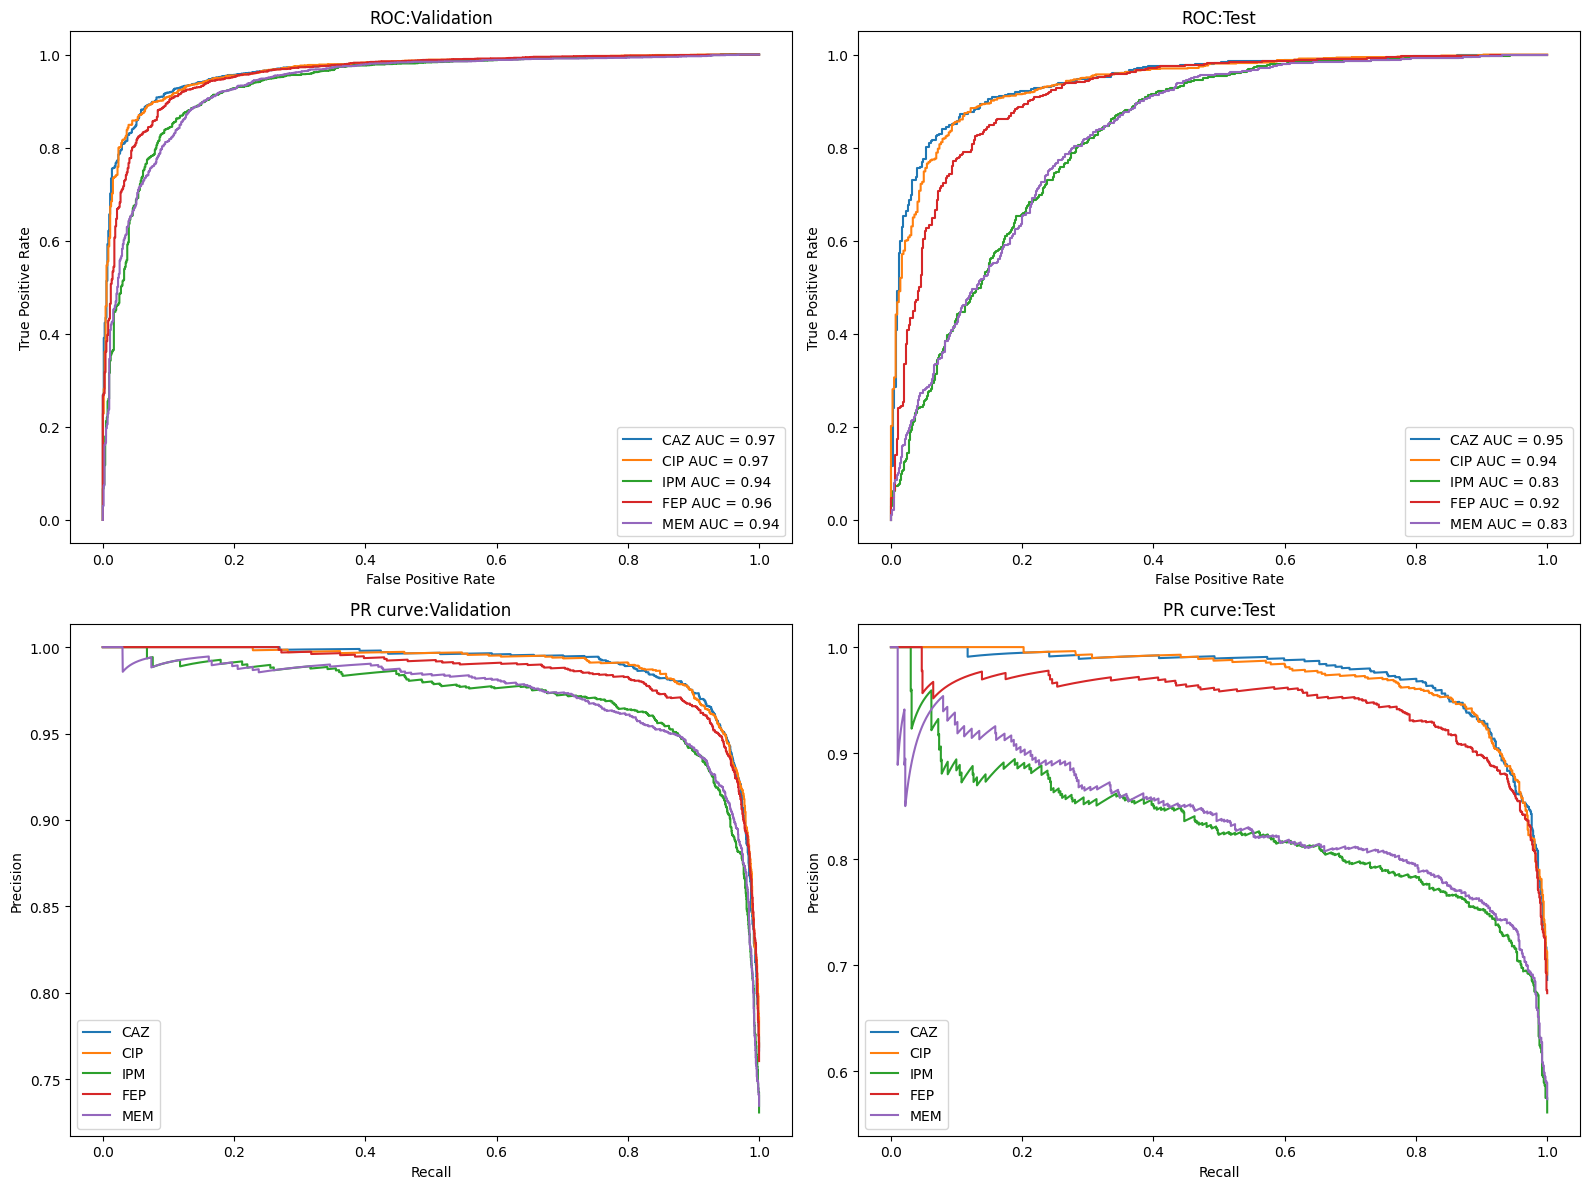

In [78]:
plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
fpr, tpr, thresholds = roc_curve(y_test_CAZ, pred_CAZ_v)
auc = roc_auc_score(y_test_CAZ, pred_CAZ_v)
plt.plot(fpr, tpr, label=f'CAZ AUC = {auc:.2f}')
fpr, tpr, thresholds = roc_curve(y_test_CIP, pred_CIP_v)
auc = roc_auc_score(y_test_CIP, pred_CIP_v)
plt.plot(fpr, tpr, label=f'CIP AUC = {auc:.2f}')
fpr, tpr, thresholds = roc_curve(y_test_IPM, pred_IPM_v)
auc = roc_auc_score(y_test_IPM, pred_IPM_v)
plt.plot(fpr, tpr, label=f'IPM AUC = {auc:.2f}')
fpr, tpr, thresholds = roc_curve(y_test_FEP, pred_FEP_v)
auc = roc_auc_score(y_test_FEP, pred_FEP_v)
plt.plot(fpr, tpr, label=f'FEP AUC = {auc:.2f}')
fpr, tpr, thresholds = roc_curve(y_test_MEM, pred_MEM_v)
auc = roc_auc_score(y_test_MEM, pred_MEM_v)
plt.plot(fpr, tpr, label=f'MEM AUC = {auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC:Validation')
plt.legend(loc='lower right')

plt.subplot(2, 2, 2)
fpr, tpr, thresholds = roc_curve(label_test['CAZ'], pred_CAZ)
auc = roc_auc_score(label_test['CAZ'], pred_CAZ)
plt.plot(fpr, tpr, label=f'CAZ AUC = {auc:.2f}')
fpr, tpr, thresholds = roc_curve(label_test['CIP'], pred_CIP)
auc = roc_auc_score(label_test['CIP'], pred_CIP)
plt.plot(fpr, tpr, label=f'CIP AUC = {auc:.2f}')
fpr, tpr, thresholds = roc_curve(label_test['IPM'], pred_IPM)
auc = roc_auc_score(label_test['IPM'], pred_IPM)
plt.plot(fpr, tpr, label=f'IPM AUC = {auc:.2f}')
fpr, tpr, thresholds = roc_curve(label_test['FEP'], pred_FEP)
auc = roc_auc_score(label_test['FEP'], pred_FEP)
plt.plot(fpr, tpr, label=f'FEP AUC = {auc:.2f}')
fpr, tpr, thresholds = roc_curve(label_test['MEM'], pred_MEM)
auc = roc_auc_score(label_test['MEM'], pred_MEM)
plt.plot(fpr, tpr, label=f'MEM AUC = {auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC:Test')
plt.legend(loc='lower right')

plt.subplot(2, 2, 3)
precision, recall, thresholds = precision_recall_curve(y_test_CAZ, pred_CAZ_v)
plt.plot(recall, precision, label='CAZ')
precision, recall, thresholds = precision_recall_curve(y_test_CIP, pred_CIP_v)
plt.plot(recall, precision, label='CIP')
precision, recall, thresholds = precision_recall_curve(y_test_IPM, pred_IPM_v)
plt.plot(recall, precision, label='IPM')
precision, recall, thresholds = precision_recall_curve(y_test_FEP, pred_FEP_v)
plt.plot(recall, precision, label='FEP')
precision, recall, thresholds = precision_recall_curve(y_test_MEM, pred_MEM_v)
plt.plot(recall, precision, label='MEM')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve:Validation')
plt.legend(loc='lower left')

plt.subplot(2, 2, 4)
precision, recall, thresholds = precision_recall_curve(label_test['CAZ'], pred_CAZ)
plt.plot(recall, precision, label='CAZ')
precision, recall, thresholds = precision_recall_curve(label_test['CIP'], pred_CIP)
plt.plot(recall, precision, label='CIP')
precision, recall, thresholds = precision_recall_curve(label_test['IPM'], pred_IPM)
plt.plot(recall, precision, label='IPM')
precision, recall, thresholds = precision_recall_curve(label_test['FEP'], pred_FEP)
plt.plot(recall, precision, label='FEP')
precision, recall, thresholds = precision_recall_curve(label_test['MEM'], pred_MEM)
plt.plot(recall, precision, label='MEM')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve:Test')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [83]:
tn, fp, fn, tp = confusion_matrix(label_test['CAZ'], pred_CAZ > 0.5).ravel()
sen_CAZ = tp / (tp + fn)
spe_CAZ = tn / (tn + fp)
acc_CAZ = (tp + tn) / (tp + tn + fp + fn)
mcc_CAZ = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))

tn, fp, fn, tp = confusion_matrix(label_test['CIP'], pred_CIP > 0.5).ravel()
sen_CIP = tp / (tp + fn)
spe_CIP = tn / (tn + fp)
acc_CIP = (tp + tn) / (tp + tn + fp + fn)
mcc_CIP = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))

tn, fp, fn, tp = confusion_matrix(label_test['IPM'], pred_IPM > 0.5).ravel()
sen_IPM = tp / (tp + fn)
spe_IPM = tn / (tn + fp)
acc_IPM = (tp + tn) / (tp + tn + fp + fn)
mcc_IPM = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))

tn, fp, fn, tp = confusion_matrix(label_test['FEP'], pred_FEP > 0.5).ravel()
sen_FEP = tp / (tp + fn)
spe_FEP = tn / (tn + fp)
acc_FEP = (tp + tn) / (tp + tn + fp + fn)
mcc_FEP = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))

tn, fp, fn, tp = confusion_matrix(label_test['MEM'], pred_MEM > 0.5).ravel()
sen_MEM = tp / (tp + fn)
spe_MEM = tn / (tn + fp)
acc_MEM = (tp + tn) / (tp + tn + fp + fn)
mcc_MEM = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))

result = pd.DataFrame({
    'Drug': ['CAZ', 'CIP', 'IPM', 'FEP', 'MEM'],
    'Sensitivity': [sen_CAZ, sen_CIP, sen_IPM, sen_FEP, sen_MEM],
    'Specificity': [spe_CAZ, spe_CIP, spe_IPM, spe_FEP, spe_MEM],
    'Accuracy': [acc_CAZ, acc_CIP, acc_IPM, acc_FEP, acc_MEM],
    'MCC': [mcc_CAZ, mcc_CIP, mcc_IPM, mcc_FEP, mcc_MEM]
})
print('Test result:')
print(result)

Test result:
  Drug  Sensitivity  Specificity  Accuracy       MCC
0  CAZ     0.951768     0.672131  0.863971  0.674068
1  CIP     0.955319     0.690476  0.873529  0.694573
2  IPM     0.942333     0.542714  0.766912  0.541818
3  FEP     0.954148     0.668919  0.861029  0.675401
4  MEM     0.948718     0.537931  0.773529  0.549510


In [85]:
tn, fp, fn, tp = confusion_matrix(y_test_CAZ, pred_CAZ_v > 0.5).ravel()
sen_CAZ = tp / (tp + fn)
spe_CAZ = tn / (tn + fp)
acc_CAZ = (tp + tn) / (tp + tn + fp + fn)
mcc_CAZ = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))

tn, fp, fn, tp = confusion_matrix(y_test_CIP, pred_CIP_v > 0.5).ravel()
sen_CIP = tp / (tp + fn)
spe_CIP = tn / (tn + fp)
acc_CIP = (tp + tn) / (tp + tn + fp + fn)
mcc_CIP = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))

tn, fp, fn, tp = confusion_matrix(y_test_IPM, pred_IPM_v > 0.5).ravel()
sen_IPM = tp / (tp + fn)
spe_IPM = tn / (tn + fp)
acc_IPM = (tp + tn) / (tp + tn + fp + fn)
mcc_IPM = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))

tn, fp, fn, tp = confusion_matrix(y_test_FEP, pred_FEP_v > 0.5).ravel()
sen_FEP = tp / (tp + fn)
spe_FEP = tn / (tn + fp)
acc_FEP = (tp + tn) / (tp + tn + fp + fn)
mcc_FEP = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))

tn, fp, fn, tp = confusion_matrix(y_test_MEM, pred_MEM_v > 0.5).ravel()
sen_MEM = tp / (tp + fn)
spe_MEM = tn / (tn + fp)
acc_MEM = (tp + tn) / (tp + tn + fp + fn)
mcc_MEM = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))

result = pd.DataFrame({
    'Drug': ['CAZ', 'CIP', 'IPM', 'FEP', 'MEM'],
    'Sensitivity': [sen_CAZ, sen_CIP, sen_IPM, sen_FEP, sen_MEM],
    'Specificity': [spe_CAZ, spe_CIP, spe_IPM, spe_FEP, spe_MEM],
    'Accuracy': [acc_CAZ, acc_CIP, acc_IPM, acc_FEP, acc_MEM],
    'MCC': [mcc_CAZ, mcc_CIP, mcc_IPM, mcc_FEP, mcc_MEM]
})
print('Validation result:')
print(result)

Validation result:
  Drug  Sensitivity  Specificity  Accuracy       MCC
0  CAZ     0.965008     0.756233  0.916290  0.758006
1  CIP     0.968894     0.728671  0.913381  0.746094
2  IPM     0.957099     0.698679  0.887524  0.702807
3  FEP     0.966851     0.740891  0.912734  0.751409
4  MEM     0.960845     0.708892  0.893988  0.717525
